# Modelling

## KNN Regretion


📊 Modeling Data t1–t2
MSE  : 0.0000000000
R²   : -0.0797
MAPE : 24.52%
✅ Model disimpan di  : no2_models/knn_day2.pkl
✅ Scaler disimpan di : no2_models/scaler_day2.pkl

📊 Modeling Data t1–t3
MSE  : 0.0000000000
R²   : -0.1163
MAPE : 21.76%
✅ Model disimpan di  : no2_models/knn_day3.pkl
✅ Scaler disimpan di : no2_models/scaler_day3.pkl

📊 Modeling Data t1–t4
MSE  : 0.0000000000
R²   : 0.0710
MAPE : 21.18%
✅ Model disimpan di  : no2_models/knn_day4.pkl
✅ Scaler disimpan di : no2_models/scaler_day4.pkl

📊 Modeling Data t1–t5
MSE  : 0.0000000000
R²   : -0.1511
MAPE : 18.85%
✅ Model disimpan di  : no2_models/knn_day5.pkl
✅ Scaler disimpan di : no2_models/scaler_day5.pkl


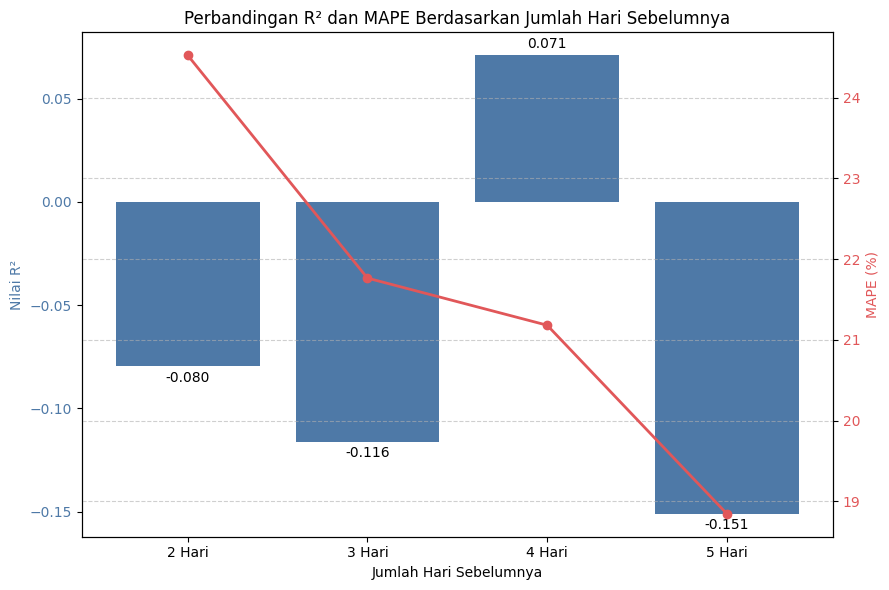

In [1]:
# 1️⃣ Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2️⃣ Pastikan folder model ada
os.makedirs("no2_models", exist_ok=True)

# 3️⃣ Membaca Dataset
day2 = pd.read_csv('no2_results/day2_selected.csv')
day3 = pd.read_csv('no2_results/day3_selected.csv')
day4 = pd.read_csv('no2_results/day4_selected.csv')
day5 = pd.read_csv('no2_results/day5_selected.csv')

# 4️⃣ Fungsi Evaluasi KNN + Simpan Model
def train_and_save_knn(df, n_day, k=5):
    print(f"\n{'='*45}\n📊 Modeling Data t1–t{n_day}\n{'='*45}")

    # Pisahkan fitur dan target
    X = df.drop(columns=['NO2'])
    y = df['NO2']

    # Split data (20% untuk test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standarisasi fitur
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model KNN
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE  : {mse:.10f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%")

    # Simpan model dan scaler ke file .pkl
    model_path = f"no2_models/knn_day{n_day}.pkl"
    scaler_path = f"no2_models/scaler_day{n_day}.pkl"

    with open(model_path, "wb") as f:
        pickle.dump(knn, f)
    with open(scaler_path, "wb") as f:
        pickle.dump(scaler, f)

    print(f"✅ Model disimpan di  : {model_path}")
    print(f"✅ Scaler disimpan di : {scaler_path}")

    return r2, mse, mape


# 5️⃣ Jalankan untuk tiap jumlah hari
r2_day2, mse_day2, mape_day2 = train_and_save_knn(day2, n_day=2)
r2_day3, mse_day3, mape_day3 = train_and_save_knn(day3, n_day=3)
r2_day4, mse_day4, mape_day4 = train_and_save_knn(day4, n_day=4)
r2_day5, mse_day5, mape_day5 = train_and_save_knn(day5, n_day=5)

# 6️⃣ Visualisasi Perbandingan R²
x = ['2 Hari', '3 Hari', '4 Hari', '5 Hari']
y_r2 = [r2_day2, r2_day3, r2_day4, r2_day5]
y_mape = [mape_day2, mape_day3, mape_day4, mape_day5]

fig, ax1 = plt.subplots(figsize=(9, 6))

# R² Bar Chart
bars = ax1.bar(x, y_r2, color='#4e79a7', label='R² Score')
ax1.set_xlabel("Jumlah Hari Sebelumnya")
ax1.set_ylabel("Nilai R²", color='#4e79a7')
ax1.tick_params(axis='y', labelcolor='#4e79a7')
ax1.bar_label(bars, fmt='%.3f', padding=3)

# MAPE Line Plot (sumbu kedua)
ax2 = ax1.twinx()
ax2.plot(x, y_mape, color='#e15759', marker='o', linewidth=2, label='MAPE (%)')
ax2.set_ylabel("MAPE (%)", color='#e15759')
ax2.tick_params(axis='y', labelcolor='#e15759')

plt.title("Perbandingan R² dan MAPE Berdasarkan Jumlah Hari Sebelumnya")
plt.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()


### Multiday Forecast


📊 Multi-Day Forecast t1–t3 → 3 Hari ke Depan

📅 Hari ke-1:
  MSE  : 0.0000000000
  R²   : -0.1831
  MAPE : 17.64%

📅 Hari ke-2:
  MSE  : 0.0000000000
  R²   : -0.1437
  MAPE : 18.14%

📅 Hari ke-3:
  MSE  : 0.0000000000
  R²   : -0.2945
  MAPE : 17.59%

✅ Model disimpan di  : no2_models_multiday/knn_day3_forecast3.pkl
✅ Scaler disimpan di : no2_models_multiday/scaler_day3_forecast3.pkl

📊 Multi-Day Forecast t1–t4 → 3 Hari ke Depan

📅 Hari ke-1:
  MSE  : 0.0000000000
  R²   : -0.2198
  MAPE : 17.73%

📅 Hari ke-2:
  MSE  : 0.0000000000
  R²   : -0.1700
  MAPE : 17.76%

📅 Hari ke-3:
  MSE  : 0.0000000000
  R²   : -0.2652
  MAPE : 17.46%

✅ Model disimpan di  : no2_models_multiday/knn_day4_forecast3.pkl
✅ Scaler disimpan di : no2_models_multiday/scaler_day4_forecast3.pkl

📊 Multi-Day Forecast t1–t5 → 3 Hari ke Depan

📅 Hari ke-1:
  MSE  : 0.0000000000
  R²   : -0.2232
  MAPE : 17.81%

📅 Hari ke-2:
  MSE  : 0.0000000000
  R²   : -0.1415
  MAPE : 17.67%

📅 Hari ke-3:
  MSE  : 0.0000000000
  

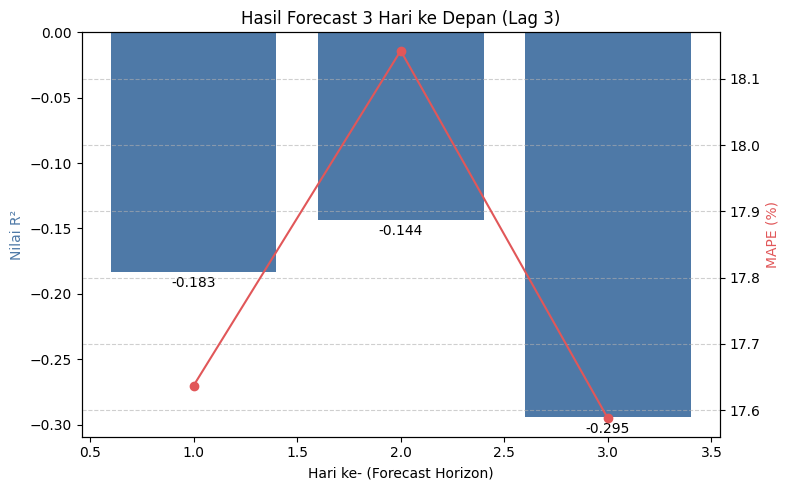

In [4]:
# 1️⃣ Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2️⃣ Pastikan folder model ada
os.makedirs("no2_models_multiday", exist_ok=True)

# 3️⃣ Baca dataset NO2 (hasil preprocessing & supervised)
day2 = pd.read_csv('no2_results/day2_forecast3_selected.csv')
day3 = pd.read_csv('no2_results/day3_forecast3_selected.csv')
day4 = pd.read_csv('no2_results/day4_forecast3_selected.csv')
day5 = pd.read_csv('no2_results/day5_forecast3_selected.csv')

# 4️⃣ Fungsi untuk membuat target multi-step (misal t+1, t+2, t+3)
def make_multiday_target(df, horizon=3):
    data = df.copy()
    for i in range(1, horizon + 1):
        data[f"NO2_t+{i}"] = data["NO2_t-1"].shift(-i)
    data = data.dropna().reset_index(drop=True)
    return data

# 5️⃣ Fungsi untuk melatih model multi-output forecasting
def train_multiday_knn(df, n_day, horizon=3, k=5):
    print(f"\n{'='*45}\n📊 Multi-Day Forecast t1–t{n_day} → {horizon} Hari ke Depan\n{'='*45}")
    
    # Buat target multi-day
    df_multi = make_multiday_target(df, horizon=horizon)

    # Pisahkan fitur & target (multi-output)
    X = df_multi.drop(columns=[col for col in df_multi.columns if "NO2_t+" in col])
    y = df_multi[[col for col in df_multi.columns if "NO2_t+" in col]]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Standarisasi
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model KNN (multi-output)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Evaluasi untuk setiap horizon
    results = []
    for i in range(horizon):
        mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        mape = np.mean(np.abs((y_test.iloc[:, i] - y_pred[:, i]) / y_test.iloc[:, i])) * 100
        results.append((i+1, mse, r2, mape))
        print(f"\n📅 Hari ke-{i+1}:")
        print(f"  MSE  : {mse:.10f}")
        print(f"  R²   : {r2:.4f}")
        print(f"  MAPE : {mape:.2f}%")

    # Simpan model & scaler
    model_path = f"no2_models_multiday/knn_day{n_day}_forecast{horizon}.pkl"
    scaler_path = f"no2_models_multiday/scaler_day{n_day}_forecast{horizon}.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(knn, f)
    with open(scaler_path, "wb") as f:
        pickle.dump(scaler, f)

    print(f"\n✅ Model disimpan di  : {model_path}")
    print(f"✅ Scaler disimpan di : {scaler_path}")

    return results


# 6️⃣ Jalankan Multi-day Forecast 
results_day3 = train_multiday_knn(day3, n_day=3, horizon=3)
results_day4 = train_multiday_knn(day4, n_day=4, horizon=3)
results_day5 = train_multiday_knn(day5, n_day=5, horizon=3)

# 7️⃣ Visualisasi R² per horizon
def plot_results(results, title):
    horizons = [r[0] for r in results]
    r2_scores = [r[2] for r in results]
    mape_scores = [r[3] for r in results]

    fig, ax1 = plt.subplots(figsize=(8,5))
    bars = ax1.bar(horizons, r2_scores, color="#4e79a7", label="R² Score")
    ax1.set_xlabel("Hari ke- (Forecast Horizon)")
    ax1.set_ylabel("Nilai R²", color="#4e79a7")
    ax1.bar_label(bars, fmt="%.3f", padding=3)

    ax2 = ax1.twinx()
    ax2.plot(horizons, mape_scores, color="#e15759", marker="o", label="MAPE (%)")
    ax2.set_ylabel("MAPE (%)", color="#e15759")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_results(results_day3, "Hasil Forecast 3 Hari ke Depan (Lag 3)")
